<a href="https://colab.research.google.com/github/denisbebrovich/ML-DS/blob/main/%D0%9C%D0%9E%D0%B4%D0%B74MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random

#Загрузка данных и подготовка

In [ ]:
x, y = fetch_openml(name = 'Fashion-MNIST', version = 1, return_X_y=True, as_frame = True)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


что то типа стандартизации

In [ ]:
x = x / 255
x.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000003,0.000025,0.000135,0.000388,0.000972,0.001603,0.003149,0.008645,0.022098,0.056510,...,0.135617,0.091328,0.065144,0.069896,0.089757,0.070463,0.033428,0.010790,0.003281,0.000286
std,0.000343,0.001163,0.004709,0.009643,0.017287,0.022911,0.032104,0.055362,0.092937,0.149758,...,0.225822,0.191903,0.165000,0.172163,0.203346,0.177379,0.115796,0.068179,0.036308,0.008353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.223529,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.176471,0.854902,0.725490,0.890196,0.901961,0.878431,0.882353,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


In [ ]:
y

,class
0,9
1,0
2,0
3,3
4,0
...,...
69995,9
69996,1
69997,8
69998,1


чтобы было понятно нам что рисуем

In [ ]:
dict1 = {'0': 'Футболка',
'1': 'Брюки',
'2': 'Пуловер',
'3': 'Платье',
'4': 'Пальто',
'5': 'Сандали',
'6': 'Блуза',
'7': 'Кроссовки',
'8': 'Сумка',
'9': 'Ботинки'}

y = y[y['class'].isin(dict1.keys())]
y['class'] = y['class'].replace(dict1)

<ipython-input-6-8f0239faf8eb>:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y['class'] = y['class'].replace(dict1)


In [ ]:
y

,class
0,Ботинки
1,Футболка
2,Футболка
3,Платье
4,Футболка
...,...
69995,Ботинки
69996,Брюки
69997,Сумка
69998,Брюки


смотрим что имеем

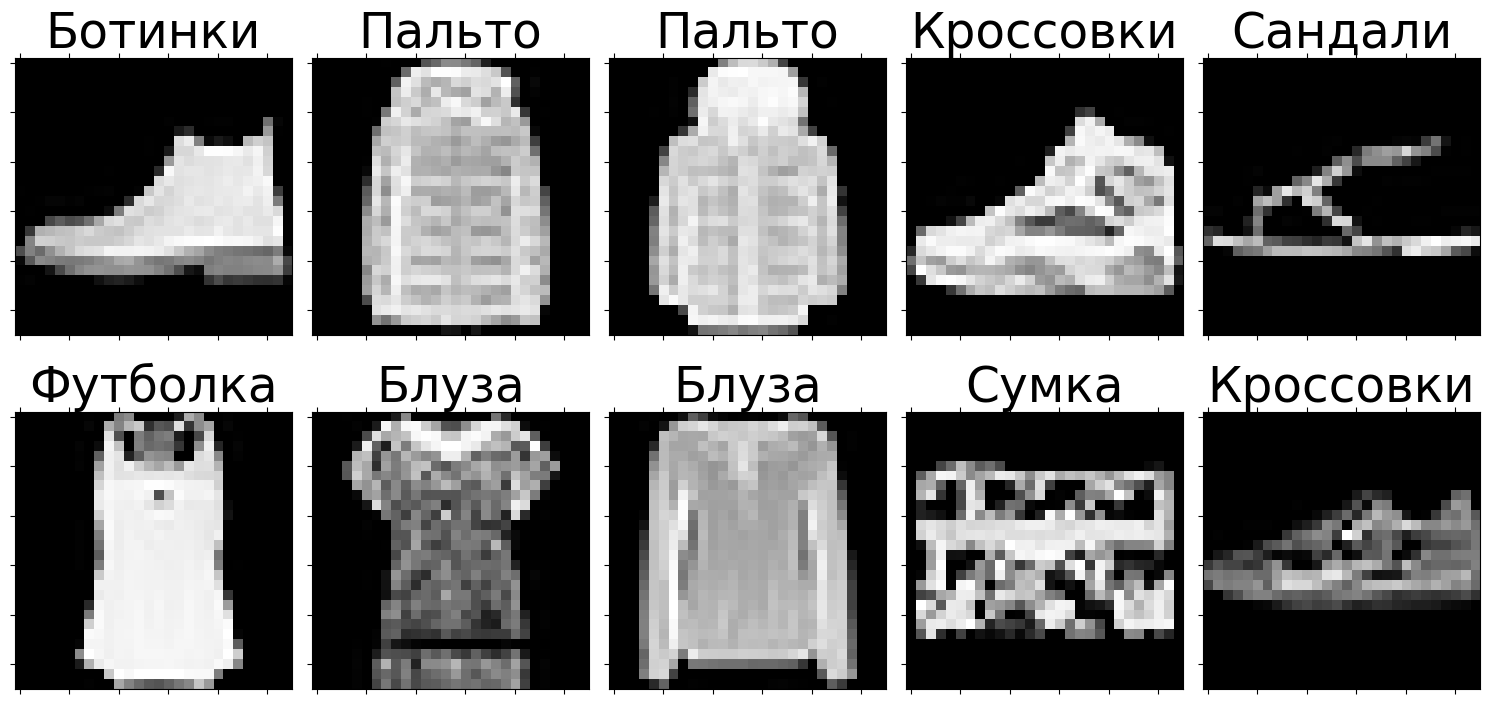

In [ ]:
n =  9992 #@param {type:"slider", min:1, max:69989, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("{}".format(str(y.iloc[i+n]['class']) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-x.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


In [ ]:
df = pd.concat([x, y], axis = 1)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Ботинки
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,Футболка
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Футболка
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Платье
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Футболка
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Ботинки
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Брюки
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Сумка
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Брюки


In [ ]:
df = pd.DataFrame(df)
df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

смотрим на данные как на числа


In [ ]:
x_plot = x.loc[0:1000,'pixel366':'pixel370'].copy()

fig = px.scatter_matrix(x_plot,
                        )
fig.update_layout(height=800,
                  width=800,
                  )

fig.show()

#Метод главных компонент

берем половину от общего числа фич

In [ ]:
comps = 355
pca = PCA(n_components = comps)
pca.fit(x)

PCA(n_components=355)

применение

In [ ]:
pca_df = pca.transform(x)
pca_df

array([[-4.96089951e-01,  6.40169544e+00, -4.74204490e+00, ...,
         1.06258285e-01,  1.90404496e-01,  1.49208375e-01],
       [ 5.51986194e+00, -1.77129979e+00, -1.01870493e+00, ...,
        -1.92021928e-02, -1.13818476e-01,  1.23274177e-01],
       [-2.84482493e+00, -4.32783385e+00,  4.19628789e-01, ...,
        -6.17356106e-02,  6.94177691e-04, -1.99609808e-02],
       ...,
       [-2.00239002e+00, -2.85076577e+00, -8.13989409e-01, ...,
        -1.66371812e-02, -1.52482738e-01,  4.51459437e-02],
       [-8.66628832e-01, -5.53914667e+00, -1.73635651e+00, ...,
         4.27053217e-02,  5.63751403e-02, -2.08565715e-02],
       [-5.96525675e+00,  3.62905522e-01,  1.04194351e+00, ...,
         2.70692446e-02,  3.02756025e-02, -7.64129706e-02]])

датафрейм с новыми компонентами

In [ ]:
data = pd.DataFrame()
pca_columns = ['pca-{}'.format(x+1) for x in range(0, comps)]
data.loc[:, pca_columns] = pca_df
data['y'] = y
data

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10,...,pca-347,pca-348,pca-349,pca-350,pca-351,pca-352,pca-353,pca-354,pca-355,y
0,-0.496090,6.401695,-4.742045,0.974184,-0.002361,-1.587041,-0.365215,-0.788385,0.129221,-0.108785,...,-0.085283,0.097979,0.089862,-0.000851,0.061901,-0.003789,0.106258,0.190404,0.149208,Ботинки
1,5.519862,-1.7713,-1.018705,1.445171,0.840969,4.974617,-0.568565,0.894712,0.497046,-0.883148,...,0.101691,-0.006653,0.050164,0.074323,-0.084681,0.03349,-0.019202,-0.113818,0.123274,Футболка
2,-2.844825,-4.327834,0.419629,0.815967,-0.416666,-0.21444,-0.009296,-0.198597,0.380468,-0.312135,...,-0.019088,-0.01088,0.02459,0.036363,-0.030376,0.012507,-0.061736,0.000694,-0.019961,Футболка
3,0.123754,-3.850481,0.800824,1.472595,0.062746,0.720709,-0.440658,-0.045991,1.339181,0.363426,...,-0.138505,0.147604,-0.044613,-0.03171,-0.02103,-0.049641,0.004376,0.046379,0.003605,Платье
4,3.154778,-4.713658,-2.929853,-1.040866,1.589313,-0.592367,0.906028,-0.557034,-0.029871,-0.627157,...,0.049993,-0.028279,-0.151411,-0.011127,-0.00341,0.006051,0.1555,-0.035252,-0.15972,Футболка
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-2.287762,5.219359,-4.086188,1.313284,-1.802264,-0.2086,-1.918401,-1.428328,0.074657,-0.690056,...,-0.034741,0.076318,0.100864,0.030038,-0.140247,-0.059166,-0.029501,0.001365,0.003676,Ботинки
69996,-3.634602,-4.956924,0.583776,0.390309,-1.416761,-0.964446,0.724599,-0.628682,0.260808,-0.274214,...,-0.104993,-0.140794,0.138111,-0.090501,0.010939,-0.172371,0.025603,0.027778,0.049593,Брюки
69997,-2.002390,-2.850766,-0.813989,3.520754,4.277825,-0.131955,-0.567519,-1.595331,0.348947,-1.289143,...,-0.022303,-0.025452,0.065502,-0.083934,0.050232,-0.02109,-0.016637,-0.152483,0.045146,Сумка
69998,-0.866629,-5.539147,-1.736357,-1.209606,-1.762319,-2.031566,1.202314,0.088058,-1.4099,-0.467091,...,-0.034376,-0.035716,-0.039539,-0.026709,0.030406,-0.061234,0.042705,0.056375,-0.020857,Брюки


объясненная дисперсия

In [ ]:
explainedVariance = pca.explained_variance_ratio_

#визуализируем компоненты

In [ ]:
def plot_line(x,y,title_x = '', title_y = '', ):
    fig = go.Figure()
    # рисуем с помощью библиотеки plotly
    fig.add_trace(
        go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        opacity=0.7,
        marker=dict(size = 5,
                    color='LightSkyBlue',
                    line=dict(
                        color='Blue',
                        width=1
            )),

        )
    )
    fig.update_layout(
            width=1000,
            height=600,
            xaxis_title=title_x,
            yaxis_title=title_y,
            yaxis_type = "log",
        template = "plotly_dark"
            )


    fig.show()


In [ ]:
plot_line(np.array(range(len(explainedVariance)))+1,
          np.cumsum(explainedVariance))

посмотрев на график с половиной компонентов от начального датасета, можем сделать вывод, что как будто будет достаточно 30 компонентов


In [ ]:
plot_line(np.array(range(len(explainedVariance)))+1,
          explainedVariance)

все по тому же графику половины компонентов, можем заметить, что самые важные компоненты - первые 20, соответственно по ним можно будет распознать примерные очертания рисунков

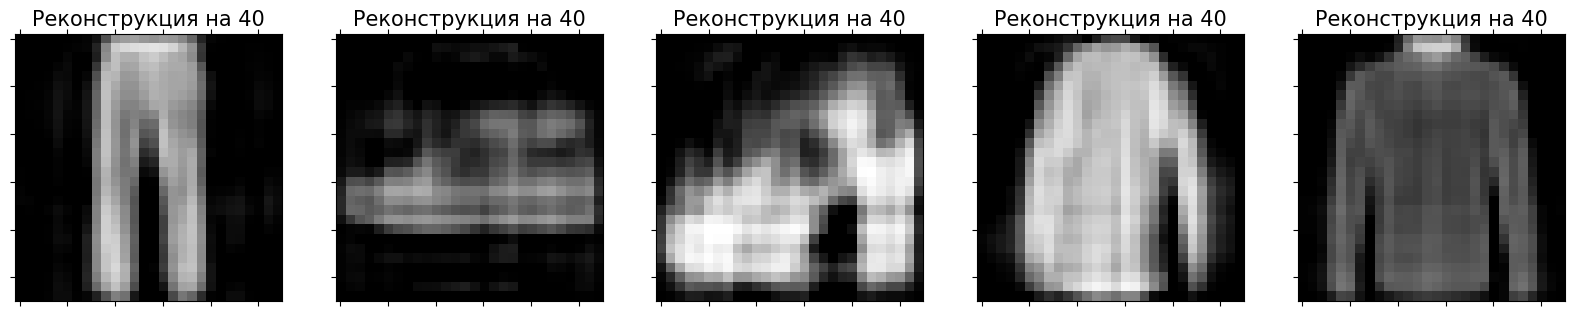

In [ ]:
n =  random.randint(0, len(pca_df)-5)
n_comp =  40

pca_inverse = np.dot(pca_df[:,:n_comp], pca.components_[:n_comp]) + pca.mean_

fig=plt.figure(figsize=(20,13))
for i in range(0,5):
  ax = fig.add_subplot(3,5,i+6)
  ax.set_title("Реконструкция на 40", size=15)
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

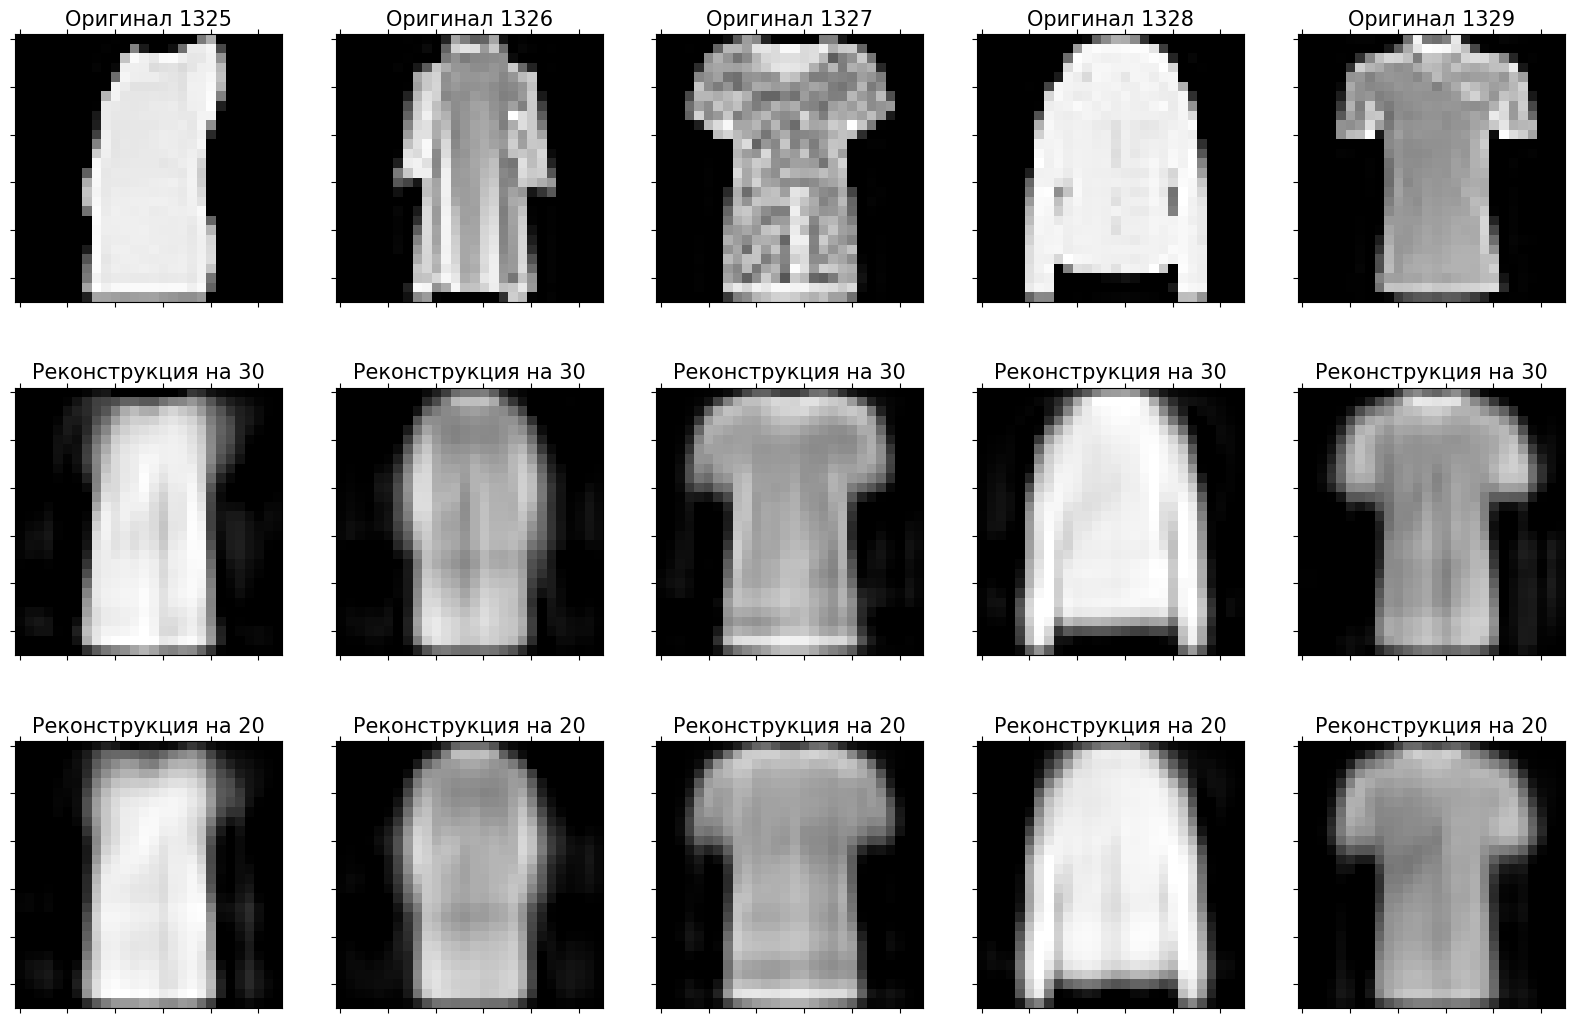

In [ ]:
n =  random.randint(0, len(pca_df)-5)
n_comp =  30
n_comp1 = 20

pca_inverse = np.dot(pca_df[:,:n_comp], pca.components_[:n_comp]) + pca.mean_
pca_inverse1 = np.dot(pca_df[:,:n_comp1], pca.components_[:n_comp1]) + pca.mean_


fig=plt.figure(figsize=(20,13))
for i in range(0,5):
  ax = fig.add_subplot(3,5,i+6)
  ax.set_title("Реконструкция на 30", size=15)
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(3,5,i+1)
  ax.set_title("Оригинал {}".format(i+n), size=15)
  ax.matshow(1-x.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(3,5,i+11)
  ax.set_title("Реконструкция на 20", size=15)
  ax.matshow(1-pca_inverse1[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

в целом на 20 есть очертания одежды, а на 30 проявляются какие то детали, может быть 30 маловато, но по локтю подходит 30.

In [ ]:
#@title  Визуализируем проекции { run: "auto" }
#@markdown ### Выбираем проекции
pca_x = 1#@param {type:"slider", min:1, max:30, step:1}
pca_y = 4#@param {type:"slider", min:1, max:30, step:1}
x_axis = "pca-{}".format(pca_x)
y_axis = "pca-{}".format(pca_y)

fig = px.scatter(
    data.sample(15000),
    x=x_axis,
    y=y_axis,
    color="y",
    opacity = 0.7,
    )

fig.update_layout(height=800,
                  width=800,
                  template = "plotly_dark")

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.show()

блуза, пальто и футболка очень похожи между собой, что и отображается в расположении точек в пространстве. так же очень похожи сандали и кроссовки

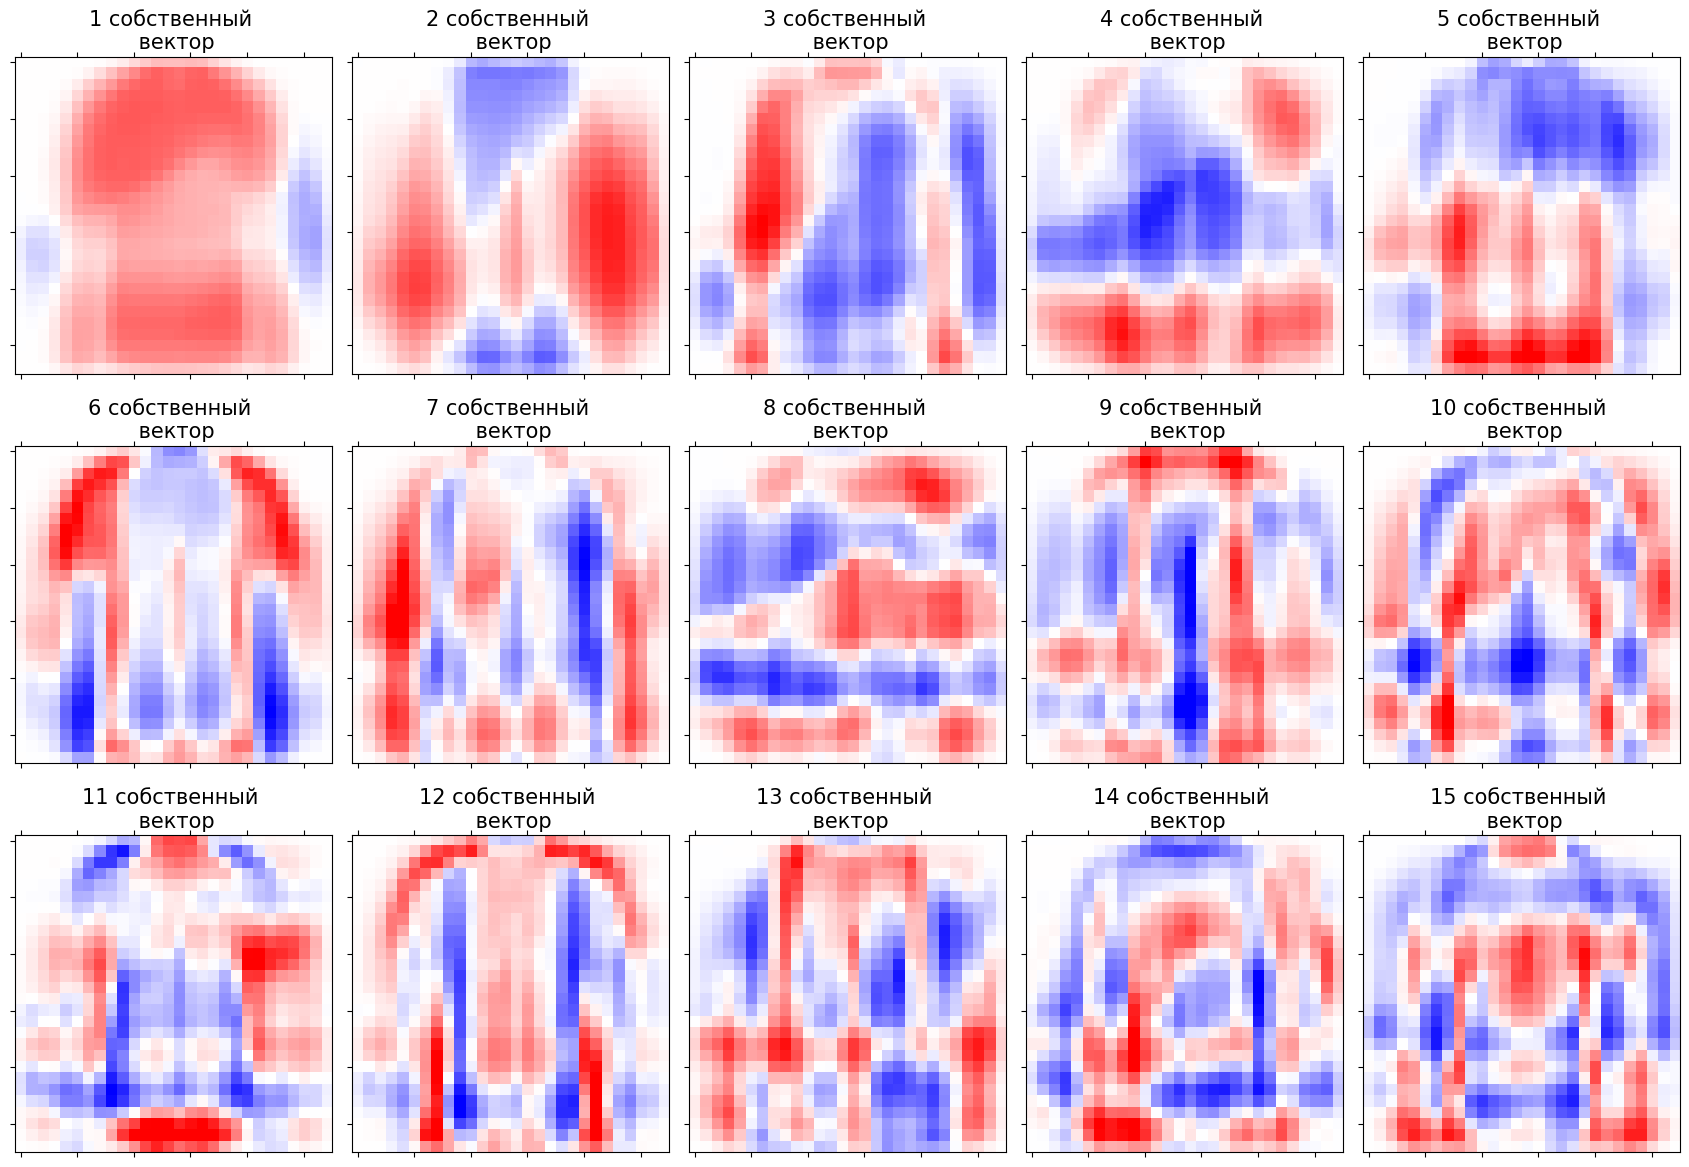

In [ ]:
W_pca=pca.components_
fig=plt.figure(figsize=(17,12))
for i in range(0,15):
  ax = fig.add_subplot(3,5,i+1,title=str(i+1) )
  ax.set_title("{} собственный \n вектор".format(str(i+1)), size=15)
  ax.matshow(W_pca[i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.1,vmax = 0.1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

на некоторых векторах можно увидеть очертания одежды, особенно хороши 5,6,7 и 12,15

#вывод

чето я не знаю даже что писать...
мы успешно нашли самые важные компоненты по методу локтя и, в целом, они несут информацию достаточную для определения рисунка. По визуализации проекции можно определить какие рисунки схожи между собой. не знаю как определить связь первоначальных данных и компонент, сил уже нет с этим вашим пца:((